/home/ayush/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


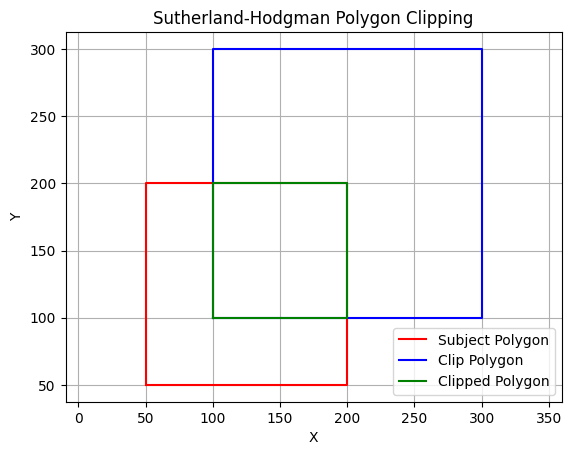

In [1]:
def clip(subjectPolygon, clipPolygon):
    def inside(p):
        return(cp2[0]-cp1[0])*(p[1]-cp1[1]) > (cp2[1]-cp1[1])*(p[0]-cp1[0])
    def computeIntersection():
        dc = [ cp1[0] - cp2[0], cp1[1] - cp2[1] ]
        dp = [ s[0] - e[0], s[1] - e[1] ]
        n1 = cp1[0] * cp2[1] - cp1[1] * cp2[0]
        n2 = s[0] * e[1] - s[1] * e[0] 
        n3 = 1.0 / (dc[0] * dp[1] - dc[1] * dp[0])
        return [(n1*dp[0] - n2*dc[0]) * n3, (n1*dp[1] - n2*dc[1]) * n3]
    outputList = subjectPolygon
    cp1 = clipPolygon[-1]
    for clipVertex in clipPolygon:
        cp2 = clipVertex
        inputList = outputList
        outputList = []
        s = inputList[-1]
        for subjectVertex in inputList:
            e = subjectVertex
            if inside(e):
                if not inside(s):
                    outputList.append(computeIntersection())
                outputList.append(e)
            elif inside(s):
                outputList.append(computeIntersection())
            s = e
        cp1 = cp2
    return(outputList)

# Example usage:
subjectPolygon = [(50, 50), (200, 50), (200, 200), (50, 200)]
clipPolygon = [(100, 100), (300, 100), (300, 300), (100, 300)]
clippedPolygon = clip(subjectPolygon, clipPolygon)

# Plotting
import matplotlib.pyplot as plt
subject_x = [point[0] for point in subjectPolygon]
subject_y = [point[1] for point in subjectPolygon]
clip_x = [point[0] for point in clipPolygon]
clip_y = [point[1] for point in clipPolygon]
clipped_x = [point[0] for point in clippedPolygon]
clipped_y = [point[1] for point in clippedPolygon]

plt.plot(subject_x + [subject_x[0]], subject_y + [subject_y[0]], 'r-', label='Subject Polygon')
plt.plot(clip_x + [clip_x[0]], clip_y + [clip_y[0]], 'b-', label='Clip Polygon')
plt.plot(clipped_x + [clipped_x[0]], clipped_y + [clipped_y[0]], 'g-', label='Clipped Polygon')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sutherland-Hodgman Polygon Clipping')
plt.axis('equal')
plt.grid(True)
plt.show()x